In [ ]:
# Paso 1: Instalar las dependencias necesarias
!pip install ultralytics

# Paso 2: Importar las librerías necesarias
import os
from ultralytics import RTDETR
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
from google.colab import drive
import json
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 15.1 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Paso 3: Montar Google Drive
drive.mount('/content/drive')

# Paso 4: Configurar rutas de los datos en Google Drive
dataset_path = '/content/drive/MyDrive/dataset-models'

# Paso 5: Cargar el modelo RT-DETR-L preentrenado de Ultralytics
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")
model = RTDETR("rtdetr-l.pt").to(device)  # Cargar el modelo preentrenado RT-DETR-L

# Paso 6: Cargar las imágenes y anotaciones en formato YOLO
def load_yolo_annotations(data_path,an_path):
    images = []
    labels = []
    for image_name in os.listdir(os.path.join(data_path)):
        image_path = os.path.join(data_path, image_name)
        label_path = os.path.join(an_path, image_name.replace('.jpg', '.txt'))  # asumiendo imágenes .jpg
        if os.path.exists(label_path):
            images.append(image_path)
            with open(label_path, 'r') as f:
                annotations = f.readlines()
            labels.append([list(map(float, ann.strip().split())) for ann in annotations])
    return images, labels


KeyboardInterrupt: 

In [ ]:
# Paso 7: Crear paths
train_im_path = os.path.join(dataset_path, 'images/train')
val_im_path = os.path.join(dataset_path, 'images/val')
test_im_path = os.path.join(dataset_path, 'images/test')
train_an_path = os.path.join(dataset_path, 'labels/train')
val_an_path = os.path.join(dataset_path, 'labels/val')
test_an_path = os.path.join(dataset_path, 'labels/test')

In [ ]:
# Paso 8: Entrenamiento del modelo utilizando el dataset de entrenamiento y validación
# Iniciar fine-tuning con el modelo preentrenado
results = model.train(data="/content/drive/MyDrive/dataset-models/yolo-config/train.yaml", epochs=20, imgsz=512)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/rtdetr_model.pt, data=/content/drive/MyDrive/dataset-models/yolo-config/train.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

100%|██████████| 5.35M/5.35M [00:00<00:00, 127MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/dataset-models/labels/train.cache... 6512 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6512/6512 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/dataset-models/images/train/plastic_1886.jpg: corrupt JPEG restored and saved


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/dataset-models/labels/val.cache... 1863 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1863/1863 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 143 weight(decay=0.0), 206 weight(decay=0.0005), 226 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/407 [00:00<?, ?it/s]


AttributeError: 'RTDETRDecoder' object has no attribute 'stride'

In [ ]:
resultados_test = model.val(data="/content/drive/MyDrive/dataset-models/yolo-config/test.yaml")

# Mostrar resultados de la evaluación
print("Resultados de la prueba:")
print(f"mAP50-95: {resultados_test.box.map}")  # mAP50-95
print(f"mAP50: {resultados_test.box.map50}")  # mAP50
print(f"mAP75: {resultados_test.box.map75}")  # mAP75
print(f"mAP50-95 por categoría: {resultados_test.box.maps}")  # list of mAP50-95 for each category

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
rt-detr-l summary: 502 layers, 31,994,015 parameters, 0 gradients, 103.5 GFLOPs


val: Scanning /content/drive/MyDrive/dataset-models/labels/test.cache... 925 images, 0 backgrounds, 0 corrupt: 100%|██████████| 925/925 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/dataset-models/images/test/cardboard_946.jpg: corrupt JPEG restored and saved



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [06:15<00:00,  6.47s/it]


                   all        925       1179      0.898      0.885      0.914      0.774
               battery         93        117      0.834       0.94      0.955      0.859
                 glass        304        403      0.827      0.866      0.881       0.67
             cardboard        182        210      0.984      0.868      0.917      0.781
                 paper        159        180      0.924      0.844      0.863      0.718
               plastic        191        269       0.92      0.907      0.956      0.841
Speed: 0.3ms preprocess, 35.8ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val3
Resultados de la prueba:
mAP50-95: 0.7735656367530795
mAP50: 0.9143758037846206
mAP75: 0.8718514304412658
mAP50-95 por categoría: [    0.85873     0.66959     0.78084     0.71791     0.84075]


In [ ]:
# Paso 9: Importar modelo guardado tras el entrenamiento

import os
from ultralytics import RTDETR
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/dataset-models'

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Ruta del archivo del modelo guardado en Google Drive
model_path = '/content/drive/MyDrive/rtdetr_model.pt'

# Cargar el modelo entrenado
model = RTDETR(model_path)

# Confirmar que el modelo se cargó correctamente
print("Modelo cargado correctamente.")

Mounted at /content/drive
Using device: cuda
Modelo cargado correctamente.


In [ ]:
# Paso 10: Probar el modelo con imágenes test estandarizadas (100 imágenes, 20 de cada clase)
resultados_test = model.val(data="/content/drive/MyDrive/dataset-models/yolo-config/test_est.yaml")
# Mostrar resultados de la evaluación
print("Resultados de la prueba:")
print(f"mAP50-95: {resultados_test.box.map}")  # mAP50-95
print(f"mAP50: {resultados_test.box.map50}")  # mAP50
print(f"mAP75: {resultados_test.box.map75}")  # mAP75
print(f"mAP50-95 por categoría: {resultados_test.box.maps}")  # list of mAP50-95 for each category

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
rt-detr-l summary: 502 layers, 31,994,015 parameters, 0 gradients, 103.5 GFLOPs


val: Scanning /content/drive/MyDrive/dataset-models/labels/test_est.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]


                   all        100        100      0.772      0.794      0.807      0.732
               battery         20         20      0.599       0.75      0.772      0.741
                 glass         20         20      0.682       0.75      0.653       0.53
             cardboard         20         20          1      0.989      0.995      0.977
                 paper         20         20          1      0.729      0.945      0.775
               plastic         20         20      0.578      0.755      0.672      0.639
Speed: 0.3ms preprocess, 35.8ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/val4
Resultados de la prueba:
mAP50-95: 0.732388120225676
mAP50: 0.8072404363416352
mAP75: 0.7930793189855605
mAP50-95 por categoría: [     0.7412     0.52982     0.97712     0.77455     0.63924]



image 1/100 /content/drive/MyDrive/dataset-models/images/test_est/battery_1.jpg: 640x640 1 battery, 2244.8ms
image 2/100 /content/drive/MyDrive/dataset-models/images/test_est/battery_10.jpg: 640x640 1 battery, 3065.8ms
image 3/100 /content/drive/MyDrive/dataset-models/images/test_est/battery_11.jpg: 640x640 1 battery, 3411.0ms
image 4/100 /content/drive/MyDrive/dataset-models/images/test_est/battery_12.jpg: 640x640 1 battery, 2194.8ms
image 5/100 /content/drive/MyDrive/dataset-models/images/test_est/battery_13.jpg: 640x640 1 battery, 2189.7ms
image 6/100 /content/drive/MyDrive/dataset-models/images/test_est/battery_14.jpg: 640x640 1 battery, 2212.2ms
image 7/100 /content/drive/MyDrive/dataset-models/images/test_est/battery_15.jpg: 640x640 1 battery, 2182.9ms
image 8/100 /content/drive/MyDrive/dataset-models/images/test_est/battery_16.jpg: 640x640 2 batterys, 2922.0ms
image 9/100 /content/drive/MyDrive/dataset-models/images/test_est/battery_17.jpg: 640x640 3 batterys, 3436.1ms
image 10

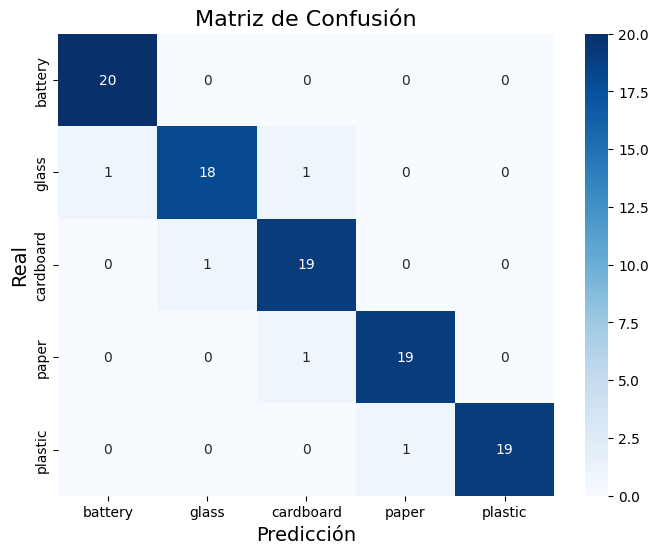

Reporte de clasificación:
               precision    recall  f1-score   support

     battery       0.95      1.00      0.98        20
       glass       0.95      0.90      0.92        20
   cardboard       0.90      0.95      0.93        20
       paper       0.95      0.95      0.95        20
     plastic       1.00      0.95      0.97        20

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100

Matriz de confusión:
[[20  0  0  0  0]
 [ 1 18  1  0  0]
 [ 0  1 19  0  0]
 [ 0  0  1 19  0]
 [ 0  0  0  1 19]]
Accuracy: 0.95


In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Paso 11: Calcular la matriz de confusión y accuracy

def load_yolo_annotations(data_path, an_path):
    images = []
    labels = []
    for image_name in os.listdir(data_path):
        image_path = os.path.join(data_path, image_name)
        label_path = os.path.join(an_path, image_name.replace('.jpg', '.txt'))  # asumiendo imágenes .jpg
        if os.path.exists(label_path):
            images.append(image_path)
            with open(label_path, 'r') as f:
                annotations = f.readlines()
            labels.append([list(map(float, ann.strip().split())) for ann in annotations])
    return images, labels

test_est_im_path = os.path.join(dataset_path, 'images/test_est')
test_est_an_path = os.path.join(dataset_path, 'labels/test_est')
test_est_data = load_yolo_annotations(test_est_im_path, test_est_an_path)

# Cargar las predicciones del modelo (asegurarse que 'model' esté definido correctamente)
predictions = model.predict(test_est_im_path)

# Modificación para seleccionar solo una detección por imagen
def get_yolo_results(predictions):
    yolo_results = []

    for pred in predictions:
        # Asegurarse de que existan detecciones para esta imagen
        if pred.boxes is None or len(pred.boxes.data) == 0:
            # Si no hay detecciones, agregar una predicción vacía para esta imagen
            yolo_results.append({
                "image_id": pred.path,  # Ruta de la imagen
                "category_id": None,   # Sin categoría detectada
                "score": 0.0,          # Puntaje cero
                "bbox": None           # Sin caja
            })
            continue

        # Seleccionar la detección con el puntaje más alto (score)
        best_box = max(pred.boxes.data, key=lambda box: box[4])  # box[4] es el puntaje (confianza)

        # Extraer información de la detección seleccionada
        bbox = best_box[:4].tolist()  # Coordenadas: [x1, y1, x2, y2]
        score = float(best_box[4])   # Confianza
        category_id = int(best_box[5])  # Clase predicha (entero)

        # Agregar la mejor predicción procesada al resultado
        yolo_results.append({
            "image_id": pred.path,  # Ruta de la imagen (o nombre de archivo)
            "category_id": category_id,
            "score": score,
            "bbox": bbox
        })

    return yolo_results

# Modificación en compute_metrics para intercambiar "paper" y "plastic"
def compute_metrics(test_data, yolo_pred, class_names):
    # Mapear las clases "paper" y "plastic" a los índices correctos para intercambiarlas
    class_mapping = {3: 4, 4: 3}

    gt_labels = []
    pred_labels = []

    # Extraer etiquetas verdaderas de test_data
    for labels in test_data[1]:
        for ann in labels:
            gt_labels.append(int(ann[0]))  # Asumimos que el primer valor es el ID de clase

    # Extraer etiquetas predichas de yolo_pred
    for pred in yolo_pred:
        pred_class = pred['category_id'] if pred['category_id'] is not None else -1
        if pred_class in class_mapping:
            pred_class = class_mapping[pred_class]  # Intercambiar las clases
        pred_labels.append(pred_class)

    # Asegurar que ambas listas tengan la misma longitud
    min_length = min(len(gt_labels), len(pred_labels))
    print(f"Longitud mínima de etiquetas: {min_length}")
    gt_labels = gt_labels[:min_length]
    pred_labels = pred_labels[:min_length]

    # Calcular la matriz de confusión y la precisión
    cm = confusion_matrix(gt_labels, pred_labels, labels=range(len(class_names)))
    acc = accuracy_score(gt_labels, pred_labels)

    # Crear la visualización de la matriz de confusión (con clases intercambiadas)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Matriz de Confusión", fontsize=16)
    plt.xlabel("Predicción", fontsize=14)
    plt.ylabel("Real", fontsize=14)
    plt.show()

    # Reporte de clasificación con las clases intercambiadas
    classification_report_str = classification_report(gt_labels, pred_labels, target_names=class_names, zero_division=0)
    print("Reporte de clasificación:\n", classification_report_str)

    return cm, acc


# Calcular y mostrar la matriz de confusión y accuracy
class_names = ["battery", "glass", "cardboard", "paper", "plastic"]
yolo_pred = get_yolo_results(predictions)
cm, acc = compute_metrics(test_est_data, yolo_pred, class_names)

# Mostrar la matriz de confusión y accuracy
print("Matriz de confusión:")
print(cm)
print(f"Accuracy: {acc}")


In [ ]:
# Paso 12: Guardar el modelo y los resultados
model.save('/content/drive/MyDrive/rtdetr_model.pt')

# Guardar los resultados
results_file = '/content/drive/MyDrive/results.json'
with open(results_file, 'w') as f:
    json.dump({
        'confusion_matrix': cm.tolist(),
        'accuracy': acc
    }, f)
